# Organización de Datos 75.06 . Primer Cuatrimestre de 2019. Examen parcial, segunda oportunidad:
### EJERCICIO 2


#### Se tiene información diaria de la cotización de acciones en el NYSE en el archivo nyse_daily.csv en el siguiente formato (symbol, date, open, measure_midday, measure_afternoon, close, volume) . Por cada acción cuyo nombre está indicado en el campo symbol , tendremos una entrada por fecha con los valores open, measure_midday, measure_afternoon, y close indicando respectivamente a qué valor abrio la acción, cuál fue el valor que tuvo al mediodía, cual fue su valor que tuvo por la tarde y cual fue su valor al cierre del mercado. Asimismo en volume se indica el volumen operado ese día para esa acción.
#### Por otro lado se cuenta con el archivo s&p500.csvde formato (symbol, company_name) que indica aquellas acciones que deben ser consideradas para calcular el índice Standard & Poor’s 500 (S&P 500).
#### Se pide calcular el valor diario del índice S&P 500, teniendo en cuenta que el mismo se calcula como el promedio del valor promedio de las mediciones que tuvo cada acción ese día ( open, measure_midday, measure_afternoon, close ), para las 500 acciones que se encuentran en el archivo s&p500.csv . El resultado debe estar en un dataframe de la forma (date, index_name, value). Por ejemplo, una entrada del mismo sería (‘2019-03-24’, ‘SP500’, ‘35.46’).
###### Nota: A los efectos prácticos del ejercicio consideraremos como estadísticamente significativo calcular el promedio con esas pocas mediciones. (***) (15pts)

In [8]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

import seaborn as sns

In [9]:
movimientos = pd.read_csv ('nyse_daily.csv')
movimientos

,symbol,date,open,measure_midday,measure_afternoon,close,volume
0,A,1/2/2018,140.11,137.83,137.01,134.03,2660
1,AA,1/5/2018,214.57,212.60,211.80,211.09,2689
2,AA$B,1/14/2018,240.34,237.47,235.67,233.74,552
3,AAC,1/13/2018,146.98,144.88,144.78,141.99,2501
4,AAN,1/12/2018,213.55,213.31,212.57,210.31,127
5,AAP,1/8/2018,169.10,168.75,167.04,166.11,1212
6,AAT,1/6/2018,166.64,164.82,162.42,160.92,2003
7,AAV,1/28/2018,193.67,190.74,190.30,189.13,484
8,AB,1/4/2018,212.20,211.42,209.52,208.46,549
9,ABB,1/18/2018,153.12,152.17,150.77,148.51,354


In [10]:
firmas = pd.read_csv ('s&p500_2.csv')
firmas

,symbol,company_name
0,A,"Agilent Technologies, Inc. Common Stock"
1,AA$B,Alcoa Inc. Depository Shares Representing 1/10...
2,AAN,"Aaron's, Inc. Common Stock"
3,AAT,"American Assets Trust, Inc. Common Stock"
4,AAV,Advantage Oil & Gas Ltd Ordinary Shares
5,ABB,ABB Ltd Common Stock
6,ABBV,AbbVie Inc. Common Stock
7,ABG,Asbury Automotive Group Inc Common Stock
8,ABM,ABM Industries Incorporated Common Stock
9,ABR$A,Arbor Realty Trust Preferred Series A


In [11]:
# Empezamos por unificar los dataframes
firmasMovimientos = pd.merge (firmas, movimientos, on = 'symbol')
firmasMovimientos

,symbol,company_name,date,open,measure_midday,measure_afternoon,close,volume
0,A,"Agilent Technologies, Inc. Common Stock",1/2/2018,140.11,137.83,137.01,134.03,2660
1,AA$B,Alcoa Inc. Depository Shares Representing 1/10...,1/14/2018,240.34,237.47,235.67,233.74,552
2,AAN,"Aaron's, Inc. Common Stock",1/12/2018,213.55,213.31,212.57,210.31,127
3,AAT,"American Assets Trust, Inc. Common Stock",1/6/2018,166.64,164.82,162.42,160.92,2003
4,AAV,Advantage Oil & Gas Ltd Ordinary Shares,1/28/2018,193.67,190.74,190.30,189.13,484
5,ABB,ABB Ltd Common Stock,1/18/2018,153.12,152.17,150.77,148.51,354
6,ABBV,AbbVie Inc. Common Stock,1/6/2018,242.53,240.46,238.92,235.93,2780
7,ABG,Asbury Automotive Group Inc Common Stock,1/6/2018,147.20,145.04,142.78,142.32,1123
8,ABM,ABM Industries Incorporated Common Stock,1/28/2018,228.41,227.87,227.78,226.12,2770
9,ABR$A,Arbor Realty Trust Preferred Series A,1/7/2018,241.12,238.51,236.75,234.11,626


In [18]:
# A continuacion, calculamos el promedio de cotizacion de cada accion considerando los valores de las columnas open, 
# measure_midday, measure_afternoon, close
firmasMovimientos['value'] = (firmasMovimientos['open'] + firmasMovimientos['measure_midday'] +\
                              firmasMovimientos['measure_afternoon'] + firmasMovimientos['close'])/4
firmasMovimientos_short = firmasMovimientos[['date', 'company_name', 'value']]
firmasMovimientos_short

,date,company_name,value
0,1/2/2018,"Agilent Technologies, Inc. Common Stock",137.2450
1,1/14/2018,Alcoa Inc. Depository Shares Representing 1/10...,236.8050
2,1/12/2018,"Aaron's, Inc. Common Stock",212.4350
3,1/6/2018,"American Assets Trust, Inc. Common Stock",163.7000
4,1/28/2018,Advantage Oil & Gas Ltd Ordinary Shares,190.9600
5,1/18/2018,ABB Ltd Common Stock,151.1425
6,1/6/2018,AbbVie Inc. Common Stock,239.4600
7,1/6/2018,Asbury Automotive Group Inc Common Stock,144.3350
8,1/28/2018,ABM Industries Incorporated Common Stock,227.5450
9,1/7/2018,Arbor Realty Trust Preferred Series A,237.6225


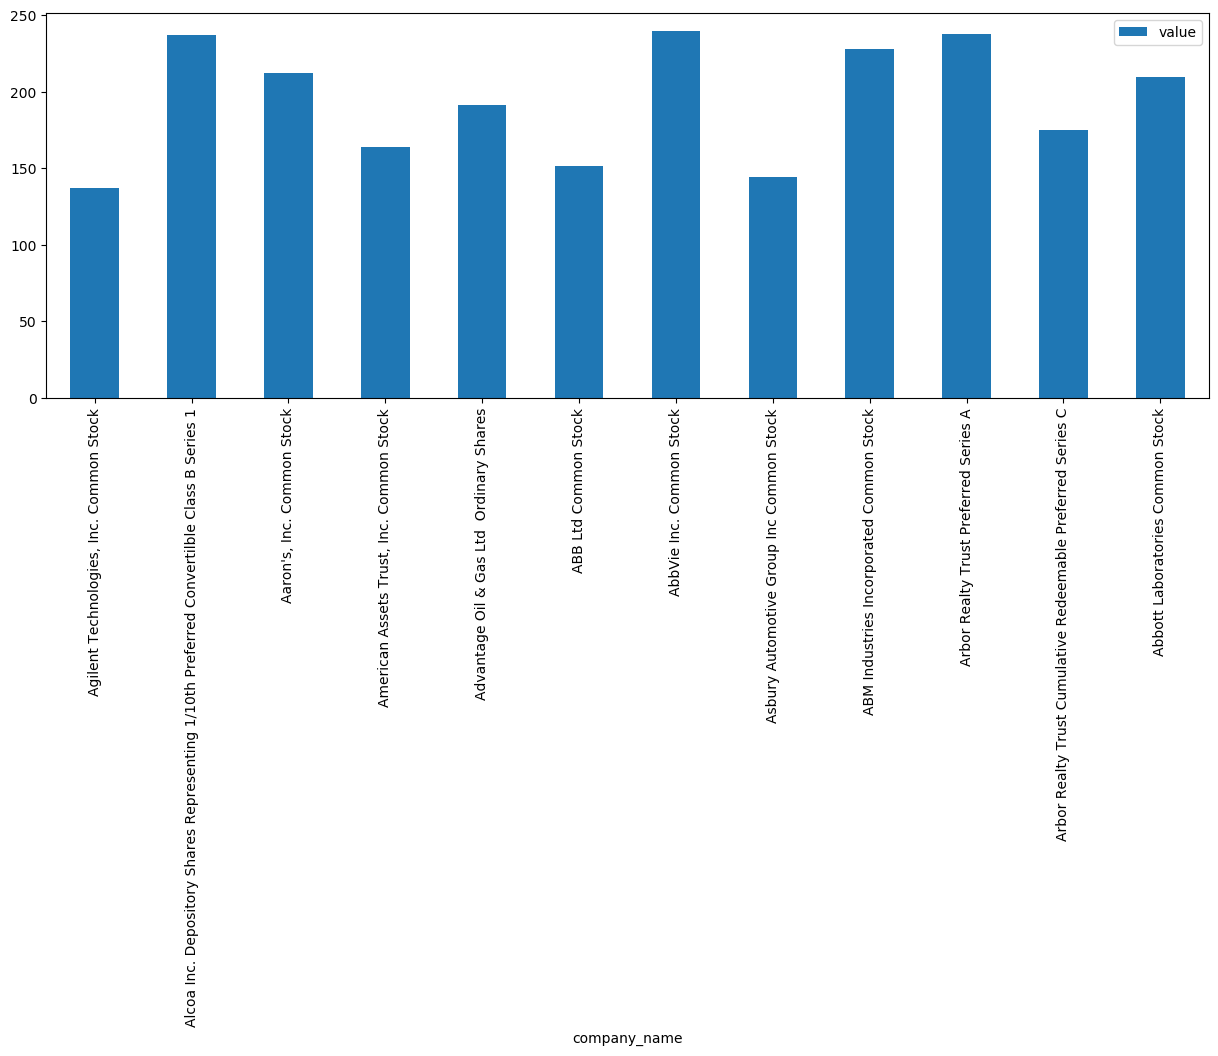

In [25]:
# Como adicional, agregamos una visualizacion
firmasMovimientosVisualizacion = firmasMovimientos[['company_name', 'value']]
firmasMovimientosVisualizacionIndex = firmasMovimientosVisualizacion.set_index('company_name')
firmasMovimientosVisualizacionIndex.plot(kind='bar')